# CMPINF 2100: Homework 07

## Vedant Kansara

### Assigned: Monday November, 2021

### DUE: Sunday Monday November 7, 2021 at 11:00AM EST

You may add as many code and markdown cells as you see fit to answer the questions.

#### Write the name of your collaborators here

None.

### Overview

You will practice fitting models with the `statsmodels` formula interface. The first three problems are focused on regression and the last problem requires that you fit a logistic regression model. Please see the `statsmodels` background page on working with the formula interface for additional help.

https://www.statsmodels.org/dev/example_formulas.html

## Import modules

You will use the following modules in this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You will also use the `statsmodels` formula api to fit the models.

In [2]:
import statsmodels.formula.api as smf

## Problem 01 
Two data sets are loaded for you in the cell below. Both consist of a single input, `x`, and a single continuous response, `y`. The two data sets were generated from the same set of assumptions, except that the second data set is noisier than the first. The low noise data set is assigned to the `df01_low` object, while the high noise data set is assigned to the `df01_high` object.

In [3]:
url_01_low = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/07/hw07_prob01_low.csv'
df01_low = pd.read_csv(url_01_low)

url_01_high = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/07/hw07_prob01_high.csv'
df01_high = pd.read_csv(url_01_high)

### 1a)

Create scatter plots between the response, `y`, and the input, `x`, for both data sets.

#### 1a) - SOLUTION

Scatterplot for the low noise data set

In [4]:
df01_low.head()

,x,y
0,-3.0,-5.624341
1,-2.5,-4.662160
2,-2.0,-3.982791
3,-1.5,-3.161049
4,-1.0,-1.918234


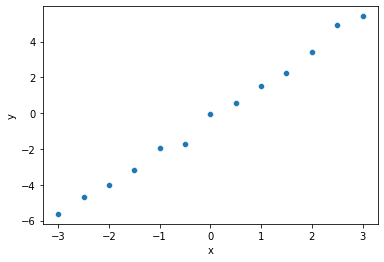

In [5]:
sns.scatterplot(data=df01_low, x='x', y='y')

plt.show()

Scatterplot for the high noise data set

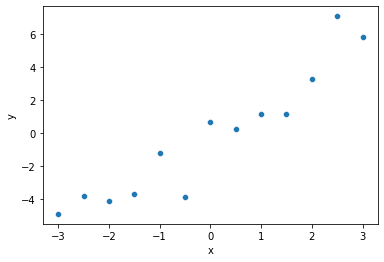

In [6]:
sns.scatterplot(data=df01_high, x='x', y='y')

plt.show()

### 1b)
Fit a linear model assuming a linear relationship between the response and the input using the **low noise** data set. Assign the result to the `mod01_low` object. You must use the `statsmodels` formula interface api to fit the model.

#### 1b) - SOLUTION

We will fit a linear model with a linear relationship between the input and the response.

$$ \mathrm{trend}_n = \beta_0 + \beta_1 x_{n} $$

In [7]:
mod01_low = smf.ols(formula = 'y~x', data=df01_low).fit()

### 1c)
Display the summary associated with the `mod01_low` object. How many coefficients are estimated? What are their estimates? 

#### 1c) - SOLUTION

In [8]:
print(mod01_low.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2020.
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           8.08e-14
Time:                        06:41:01   Log-Likelihood:               -0.76223
No. Observations:                  13   AIC:                             5.524
Df Residuals:                      11   BIC:                             6.654
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2329      0.077     -3.010      0.0

C:\Users\Vedant\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Two coefficients one for the intercept and one for the slope is estimated. 

The estimate for value of the intercept is **-0.2329**

The estimate for value of the slope is **1.8585**

### 1d)
Fit a linear model assuming a linear relationship between the response and the input using the **high noise** data set. Assign the result to the `mod01_high` object. You muse use the `statsmodels` formula intereface api to fit the model.

#### 1d) - SOLUTION

In [9]:
mod01_high = smf.ols(formula = 'y~x', data = df01_high).fit()

### 1e)
Display the summary associated with the `mod01_high` object. How many coefficients are estimated? What are their estimates?

#### 1e) - SOLUTION

In [10]:
print(mod01_high.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     83.79
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.78e-06
Time:                        06:41:01   Log-Likelihood:                -21.685
No. Observations:                  13   AIC:                             47.37
Df Residuals:                      11   BIC:                             48.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1644      0.387     -0.425      0.6

C:\Users\Vedant\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Two coefficients one for the intercept and one for the slope is estimated. 

The estimate for value of the intercept is **-0.1644**

The estimate for value of the slope is **1.8926**

### 1f)
Study the summaries associated with your two different models. Which of the reported summaries about the coefficients describes the uncertainty associated with the coefficients? Which model's coefficients are more uncertain?

#### 1f) - SOLUTION

The data with high noise describes the uncertainity associated wih the coefficients.

From the summary table we can see that the 95% confidence interval for the intercept is between **-1.016** and **0.687** which gives us the idea that the value is uncertain wheter to be greater than zero or less than zero.

Whereas in the data with low noise we can cleary distinguish that the value of intercept will be negetive as we can see the confidence interval is between **-0.403** and **-0.063**

## Problem 02
A data set is read in for you in the cell below and assigned to the `df02` object. The `.info()` method is displayed for you to show that this data set includes 2 variables. The variable `x` is a continuous input and the variable `y` is a continuous response. 

In this question you fit 4 different polynomial models to predict `y` as a function of the input `x`. You will consider a linear relationship, a cubic relationship, a 5th order polynomial, and 7th order polynomial. You will fit the models with the `statsmodels` formula api, and thus you must type in the formula for each model.

In [11]:
url_02 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/07/hw07_prob02.csv'

df02 = pd.read_csv(url_02)

In [12]:
# information about the DataFrame
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### 2a)
You should always start out by visualizing your data. Create a scatter plot between the response `y` and the input `x`.

#### 2a) - SOLUTION

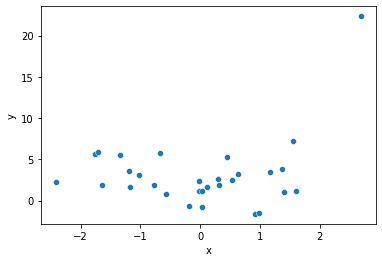

In [13]:
sns.scatterplot(data = df02, x='x', y='y')

plt.show()

### 2b)

Fit a linear relationship between the continuous response `y` and the input `x`. You are therefore fitting the following relationship between the trend $\mu_n$ and the input, $x_n$:  

$$\mu_n =\beta_0 + \beta_1 x_n$$

Assign the result to the `mod02_linear` object. Display the summary associated with the model to the screen.

#### 2b) - SOLUTION

In [14]:
mod02_linear = smf.ols(formula = 'y~x', data = df02).fit()

In [15]:
print(mod02_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.987
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.170
Time:                        06:41:01   Log-Likelihood:                -84.475
No. Observations:                  30   AIC:                             173.0
Df Residuals:                      28   BIC:                             175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1693      0.764      4.148      0.0

### 2c)
Fit a cubic relationship (a third order polynomial) between the continuous response `y` and the input `x`. You are therefore fitting the following relationship between the trend $\mu_n$ and the input, $x_n$:  

$$\mu_n =\beta_0 + \beta_1 x_n + \beta_2 x_n^{2} + \beta_3 x_n^{3}$$

Assign the model the `mod02_cubic` object. Display the summary associated with the model to the screen.

**HINT**: Polynomials or powers in the formula interface **cannot** be written with the usual Python `**` operator. This is because the formula interface comes from the old S-language syntax (the predecessor of the `R` statistical programming language). To create a polynomial term, such as the squared or quadratic term, please use the following syntax:  

`'np.power(x, 2)'`

Notice that the NumPy function `np.power()` is placed within character quotes to denote that you are typing your formula within a string.

#### 2c) - SOLUTION

In [16]:
mod02_cubic = smf.ols(formula = 'y ~ x + np.power(x,2) + np.power(x,3)', data = df02).fit()

In [17]:
print(mod02_cubic.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     28.27
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           2.42e-08
Time:                        06:41:01   Log-Likelihood:                -63.756
No. Observations:                  30   AIC:                             135.5
Df Residuals:                      26   BIC:                             141.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3047      0.523      2.

### 2d)
Fit a fifth order polynomial between the continuous response `y` and the input `x`. You are therefore fitting the following relationship between the trend $\mu_n$ and the input, $x_n$:  

$$\mu_n =\beta_0 + \beta_1 x_n + \beta_2 x_n^{2} + \beta_3 x_n^{3} + \beta_4 x_n^{4} + \beta_5 x_n^{5}$$

Assign the model the `mod02_fifth` object. Display the summary associated with the model to the screen.

#### 2d) - SOLUTION

In [18]:
mod02_fifth = smf.ols(formula = 'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5)', data = df02).fit()

In [19]:
print(mod02_fifth.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           2.00e-07
Time:                        06:41:01   Log-Likelihood:                -62.141
No. Observations:                  30   AIC:                             136.3
Df Residuals:                      24   BIC:                             144.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.5614      0.625      2.

### 2e)
Fit a seventh order polynomial between the continuous response `y` and the input `x`. You are therefore fitting the following relationship between the trend $\mu_n$ and the input, $x_n$:  

$$\mu_n =\beta_0 + \beta_1 x_n + \beta_2 x_n^{2} + \beta_3 x_n^{3} + \beta_4 x_n^{4} + \beta_5 x_n^{5} + \beta_6 x_n^{6} + \beta_7 x_n^{7}$$

Assign the model the `mod02_seventh` object. Display the summary associated with the model to the screen.

In [20]:
mod02_seventh = smf.ols(formula = 'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5) + np.power(x,6) + np.power(x,7)',
                        data=df02).fit()

In [21]:
print(mod02_seventh.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           2.82e-06
Time:                        06:41:01   Log-Likelihood:                -61.753
No. Observations:                  30   AIC:                             139.5
Df Residuals:                      22   BIC:                             150.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6555      0.755      2.

### 2f)
Which of the 4 models has the highest R-squared value on the training set?

#### 2f) - SOLUTION

Type your response in a markdown cell, you may add additional code and markdown cells to support your response.

In [22]:
mod02_linear.rsquared

0.06625079657768629

In [23]:
mod02_cubic.rsquared

0.7653816735436172

In [24]:
mod02_fifth.rsquared

0.7893297614409919

In [25]:
mod02_seventh.rsquared

0.7947139895758659

By comparing all the values of **R-square** we can see that the `mod02_seventh` model has the highest value of **R-squared**

## Problem 03
The cell below reads in a data set assigns it to the `df03` object. The `.info()` method is displayed to the screen to show you that the DataFrame consists of 2 continuous inputs, `x1` and `x2`, and a continuous response `y`. In this problem you will consider the difference between a model without interactions, an additive only model, and a model with interactions.

In [26]:
url_03 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/07/hw07_prob03.csv'

df03 = pd.read_csv(url_03)

In [27]:
# display the information of the DataFrame
df03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25 non-null     float64
 1   x2      25 non-null     float64
 2   y       25 non-null     float64
dtypes: float64(3)
memory usage: 728.0 bytes


### 3a)
Create a scatter plot between the response `y` and the input `x1`.

#### 3a) - SOLUTION

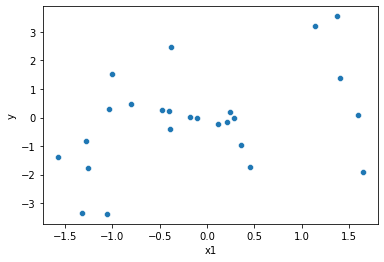

In [28]:
sns.scatterplot(data = df03, x='x1', y='y')

plt.show()

### 3b) 
Create a scatter plot between the response `y` and the input `x2`.

#### 3b) - SOLUTION

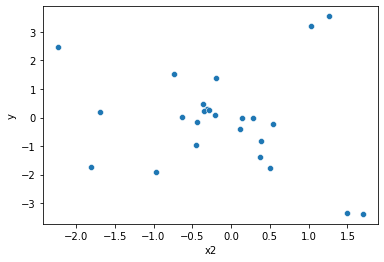

In [29]:
sns.scatterplot(data = df03, x='x2', y='y')

plt.show()

### 3c)
Fit a model between the response `y` and the two inputs, assuming linear additive terms. You are therefore fitting the following relationship between the trend $\mu_n$ and the inputs, $x_{n,1}$ and $x_{n,2}$:  

$$\mu_n =\beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2}$$

Assign the model the `mod03_add` object. Display the summary associated with the model to the screen. How many coefficients estimates are there?

#### 3c) - SOLUTION

In [30]:
mod03_add = smf.ols(formula = 'y ~ x1 + x2', data=df03).fit()

In [31]:
print(mod03_add.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.443
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.110
Time:                        06:41:02   Log-Likelihood:                -45.769
No. Observations:                  25   AIC:                             97.54
Df Residuals:                      22   BIC:                             101.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0513      0.327     -0.157      0.8

There are 3 cofficients estimated one for the intercept, one for x1 and one for x2.

### 3d) 
Fit a model between the response `y` and the two inputs, which includes an interaction term as well as the additive (main) terms. You are therefore fitting the following relationship between the trend $\mu_n$ and the inputs, $x_{n,1}$ and $x_{n,2}$:  

$$\mu_n =\beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2} + \beta_3 x_{n,1} x_{n,2}$$

Assign the model the `mod03_interact` object. Display the summary associated with the model to the screen. How many coefficient estimates are there?

#### 3d) - SOLUTION

In [32]:
mod03_interact = smf.ols(formula = 'y ~ x1*x2', data = df03).fit()

In [33]:
print(mod03_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.57
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.40e-11
Time:                        06:41:02   Log-Likelihood:                -16.984
No. Observations:                  25   AIC:                             41.97
Df Residuals:                      21   BIC:                             46.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1932      0.107      1.802      0.0

There are 4 cofficients estimates interceot, x1, x2, and for x1x2

## Problem 04
The previous three problems were associated with regression, or modeling a continuous response. This problem introduces fitting binary classification models with logistic regression. You will still use the `statsmodels` formula api to fit the model. 

The data are read in the cell below for you and assigned to the `df04` object. The `.info()` and the first 9 rows are displayed for you in the two following cells.

In [34]:
url_04 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/07/hw07_prob04.csv'

df04 = pd.read_csv(url_04)

In [35]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       25 non-null     float64
 1   y       25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
df04.head(9)

,x,y
0,0.683311,0
1,-1.125220,0
2,-1.368057,0
3,-2.137875,0
4,-1.325809,0
5,0.457833,0
6,0.656738,1
7,0.459380,0
8,-0.522140,0


### 4a)
You are working on a binary classification problem, however as shown by the `.info()` display the response is an integer data type. Check the number of unique values associated with the `y` variable and display the number of rows associated with each unique value of `y`.

#### 4a) - SOLUTION

In [37]:
df04.shape

(25, 2)

In [38]:
df04.y.nunique()

2

In [39]:
df04[df04.y == 0].value_counts().sum()

18

In [40]:
df04[df04.y == 1].value_counts().sum()

7

### 4b)
In binary classification we are interested in classifying an event of interest. Which unique value of the response `y` represents the event of interest? What is the observed fraction of events in the data set?

#### 4b) - SOLUTION

We are interseted in event where the calue of `y` corresponds to **1**.

The observed fraction of events in the dataset is 

In [41]:
df04[df04.y == 1].value_counts().sum() / df04.y.value_counts().sum()

0.28

### 4c)
Fit a logistic regression model for the binary outcome `y` with respect to the input `x`. You may assume a linear relationship between the trend of the log-odds ratio and the input.

#### 4c) - SOLUTION

In [42]:
mod_log = smf.ols(formula='y ~ np.log(x/(1-x))', data=df04).fit()

C:\Users\Vedant\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 4d) 
Display the summary for the logistic regression model to the screen. How many coefficients are there? What are the estimates? Is the trend with respect to `x` considered to be increasing or decreasing?

#### 4d) - SOLUTION

In [43]:
print(mod_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                    0.3433
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.579
Time:                        06:41:02   Log-Likelihood:                -5.5838
No. Observations:                   8   AIC:                             15.17
Df Residuals:                       6   BIC:                             15.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4993    

C:\Users\Vedant\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


There are 2 coefficients intercept and log(x/1-x). The trend is increasing.